РК 2

Шимолина П.К. ИУ5-61Б 21 вариант

Задание.

Для заданного набора данных постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы:

*   линейная/логистическая регрессия
*   случайный лес

Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? 

Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.


Описание полей:
* ID - уникальный идентификатор клиента
* Warehouse_block	- у компании есть большой склад, который разделен на такие блоки, как A, B, C, D, E
* Mode_of_Shipment - компания отправляет продукцию несколькими способами, такими как корабль, авиарейс и автомобильным транспортом
* Customer_care_calls	- количество звонков, сделанных в рамках запроса на получение информации об отправке
* Customer_rating	- компания получила оценку от каждого клиента. 1 - самый низкий (худший), 5 - самый высокий (лучший)
* Cost_of_the_Product - стоимость товара в долларах США
* Prior_purchases	- количество предыдущих покупок
* Product_importance - компания классифицировала продукт по различным параметрам, таким как низкий, средний, высокий
* Gender - мужской и женский
* Discount_offered	- скидка, предлагаемая на данный конкретный товар
* Weight_in_gms	- вес в граммах
* Reached.on.Time_Y.N - целевая переменная, где 1 указывает на то, что продукт не был доставлен вовремя, а 0 указывает на то, что он был доставлен вовремя

Датасет используется для решения задачи классификации


## Импорт библиотек и загрузка датасета

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
df = pd.read_csv('/content/drive/MyDrive/датасеты/E-Commerce Shipping Data.csv')

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


## Обзор датасета

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10999 entries, 0 to 10998

Data columns (total 12 columns):

 #   Column               Non-Null Count  Dtype 

---  ------               --------------  ----- 

 0   ID                   10999 non-null  int64 

 1   Warehouse_block      10999 non-null  object

 2   Mode_of_Shipment     10999 non-null  object

 3   Customer_care_calls  10999 non-null  int64 

 4   Customer_rating      10999 non-null  int64 

 5   Cost_of_the_Product  10999 non-null  int64 

 6   Prior_purchases      10999 non-null  int64 

 7   Product_importance   10999 non-null  object

 8   Gender               10999 non-null  object

 9   Discount_offered     10999 non-null  int64 

 10  Weight_in_gms        10999 non-null  int64 

 11  Reached.on.Time_Y.N  10999 non-null  int64 

dtypes: int64(8), object(4)

memory usage: 1.0+ MB


В датасете содержатся 8 численных столбцов, 4 текстовых

In [5]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Пропуски отсутствуют

In [7]:
df[df.duplicated()]

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N


Дубликаты отсутствуют

In [8]:
numerical_columns = df.dtypes[df.dtypes == 'int64'].index.tolist()
numerical_columns

['ID',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

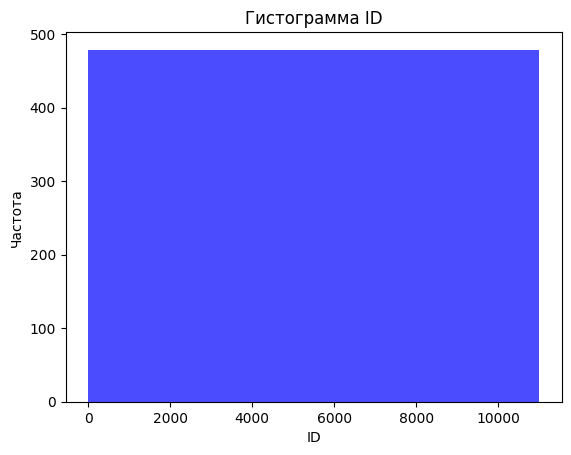

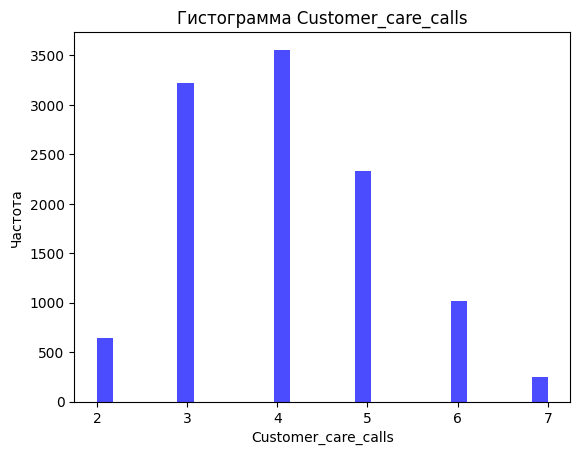

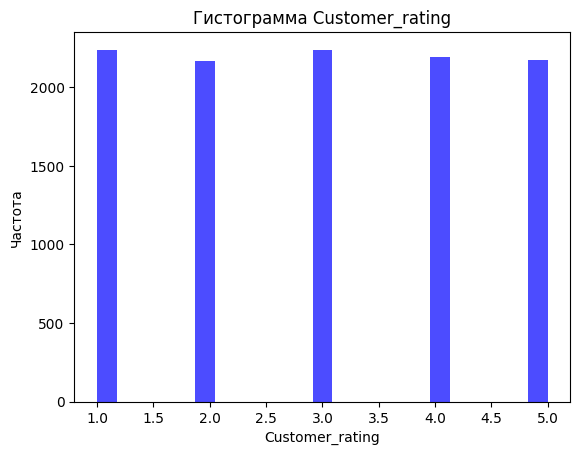

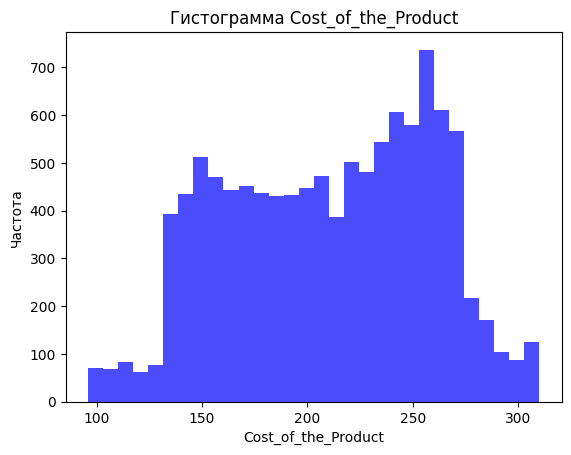

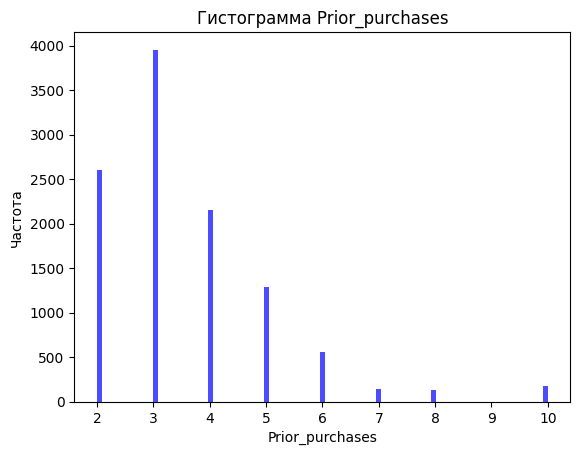

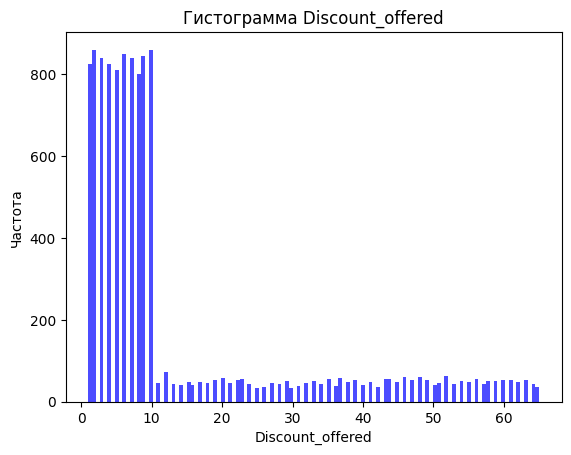

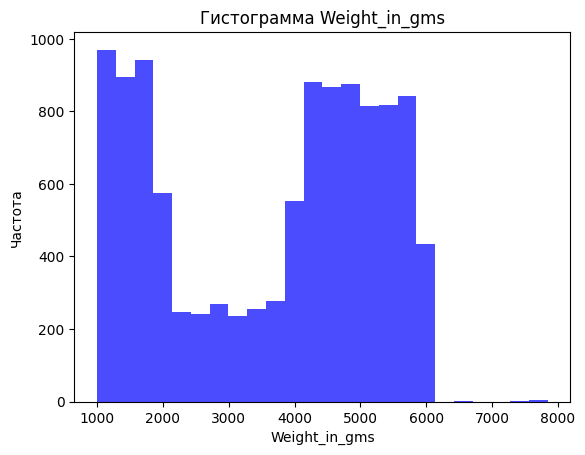

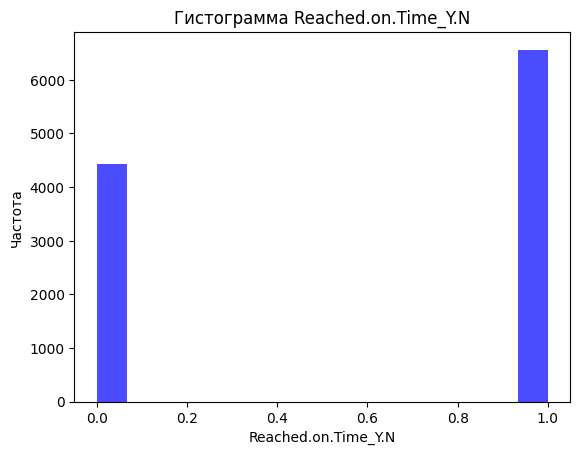

In [9]:
for column in numerical_columns:
    plt.figure()
    plt.hist(df[column], bins='auto', color='blue', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.title(f'Гистограмма {column}')
    plt.show()

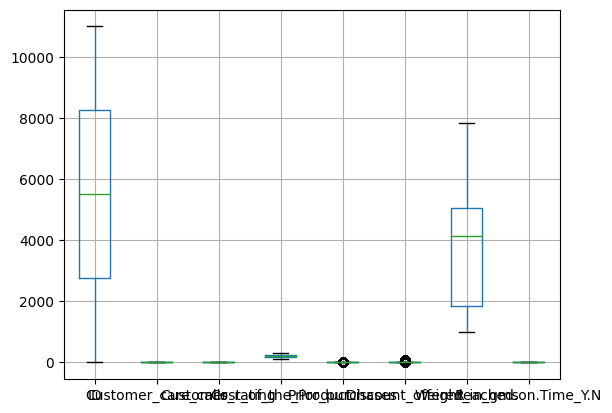

In [10]:
df.boxplot()
plt.show()

Выбросы отсутствуют

## Анализ датасета

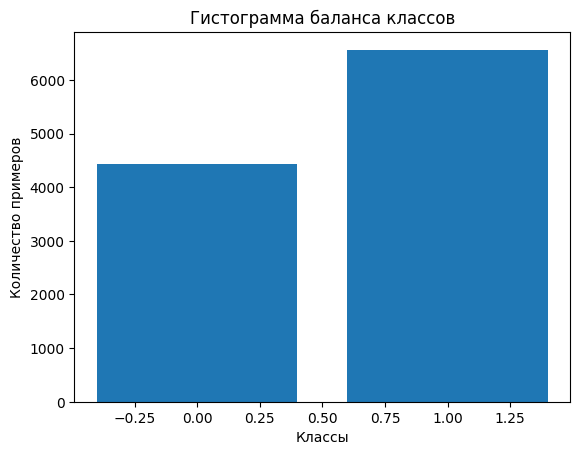

In [11]:
class_counts = df['Reached.on.Time_Y.N'].value_counts()
plt.bar(class_counts.index, class_counts.values)

plt.xlabel('Классы')
plt.ylabel('Количество примеров')
plt.title('Гистограмма баланса классов')
plt.show()

Дисбаланс присутствует, но является допустимым

In [12]:
df.groupby('Reached.on.Time_Y.N').mean()

<ipython-input-12-9e28f5928d97>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

  df.groupby('Reached.on.Time_Y.N').mean()


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
Reached.on.Time_Y.N,,,,,,,
0,7090.479486,4.147656,2.967989,214.498647,3.670424,5.545987,4168.668395
1,4424.978364,3.991467,3.005790,207.289197,3.498095,18.663721,3272.640104


* В среднем, если товар так и не был доставлен своевременно, покупатель совершает больше звонков
* Оценка немного меньше, если товар не доставлен своевременно
* Средняя стоимость недоставленных вовремя товаров, как и вес больше чем доставленных вовремя

## Категориальные признаки

In [13]:
categorical_columns = df.dtypes[df.dtypes == 'object'].index.tolist()
categorical_columns

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [14]:
encoder = OneHotEncoder(sparse=False)
encoded_data = encoder.fit_transform(df[categorical_columns])
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns, index=df.index)
df_encoded = pd.concat([df, encoded_df], axis=1)
df_encoded.drop(categorical_columns, axis=1, inplace=True)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.

  warnings.warn(


In [15]:
df_encoded.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,...,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium,Gender_F,Gender_M
0,1,4,2,177,3,44,1233,1,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2,4,5,216,2,59,3088,1,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,3,2,2,183,4,48,3374,1,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,4,3,3,176,4,10,1177,1,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,5,2,2,184,3,46,2484,1,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Масштабирование

In [16]:
numerical_columns.pop()
numerical_columns

['ID',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Discount_offered',
 'Weight_in_gms']

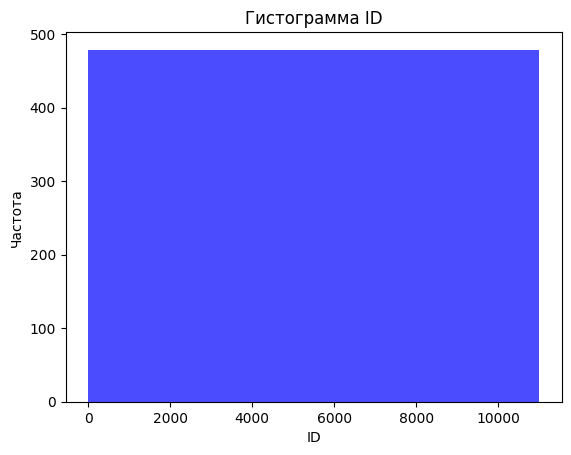

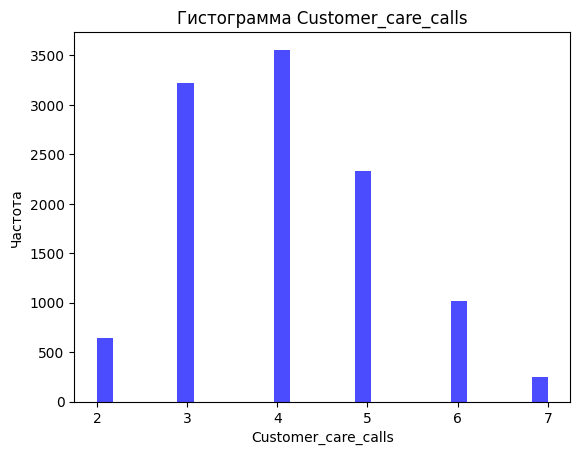

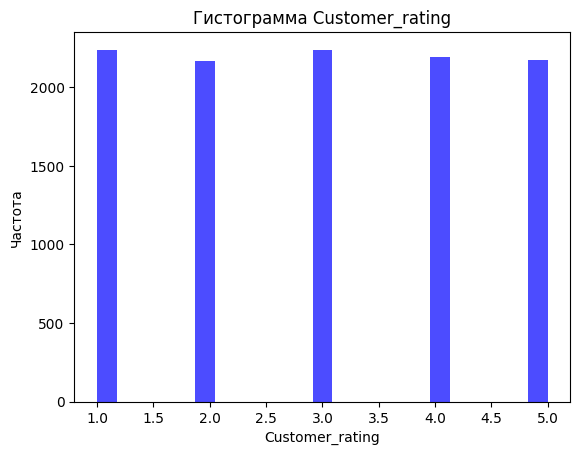

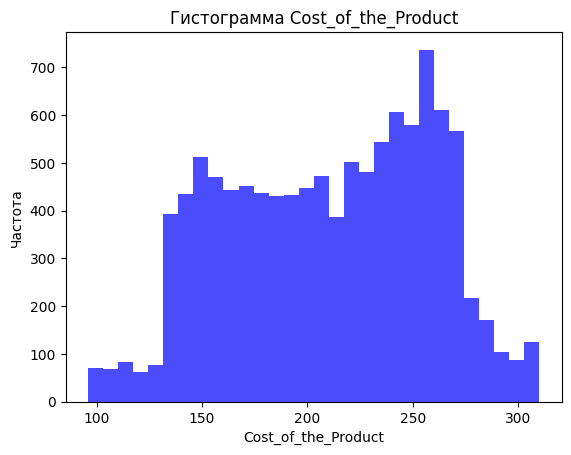

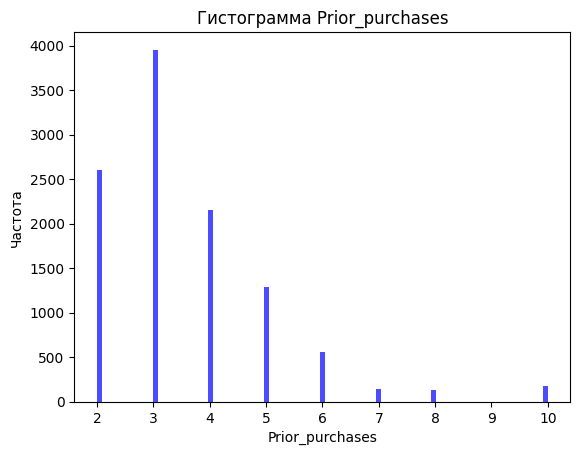

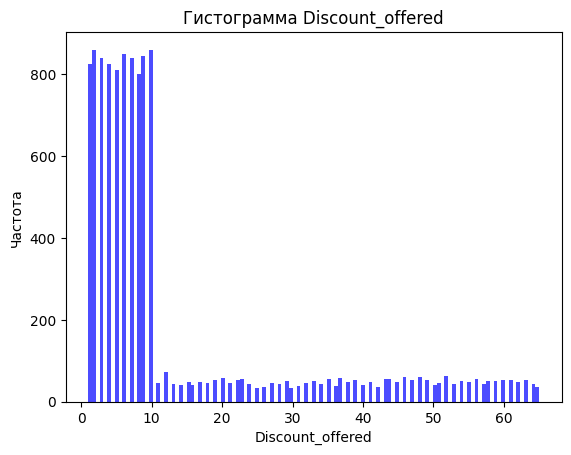

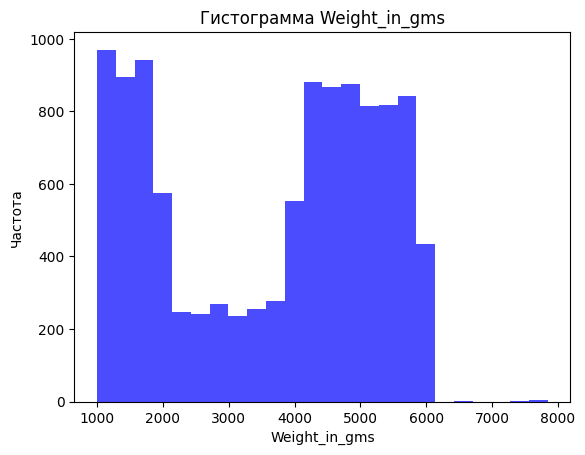

In [17]:
for column in numerical_columns:
    plt.figure()
    plt.hist(df_encoded[column], bins='auto', color='blue', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.title(f'Гистограмма {column}')
    plt.show()

In [18]:
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

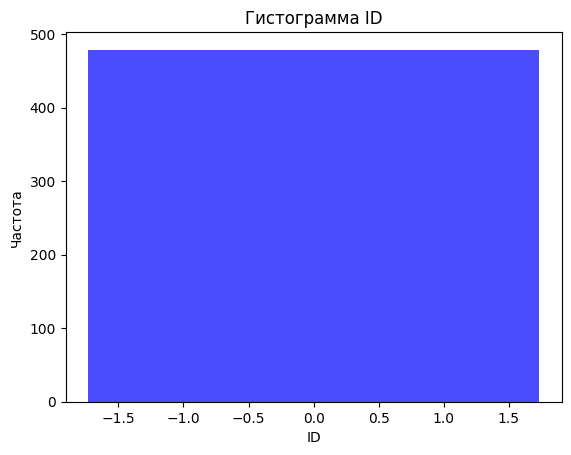

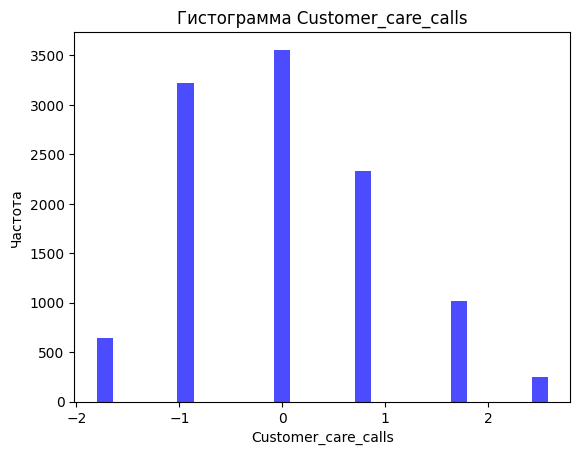

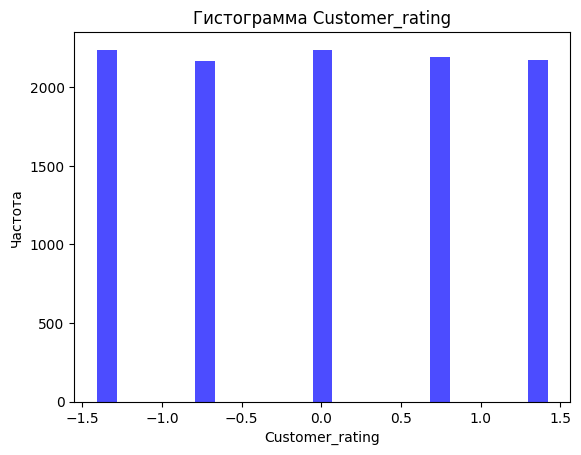

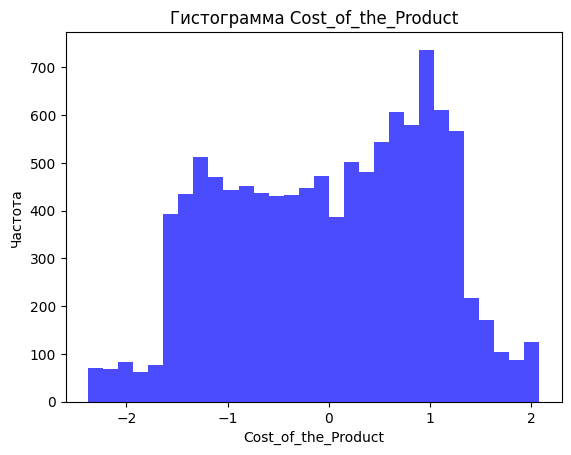

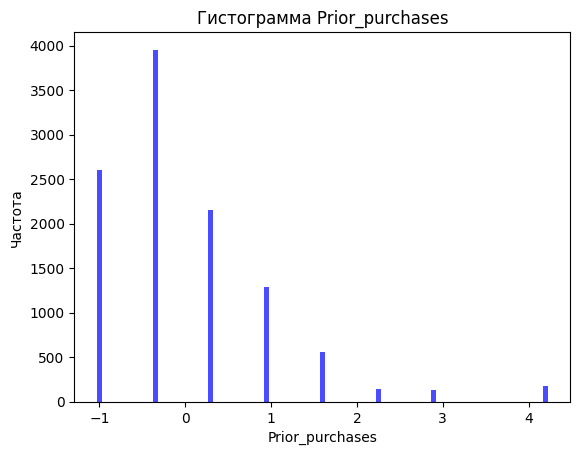

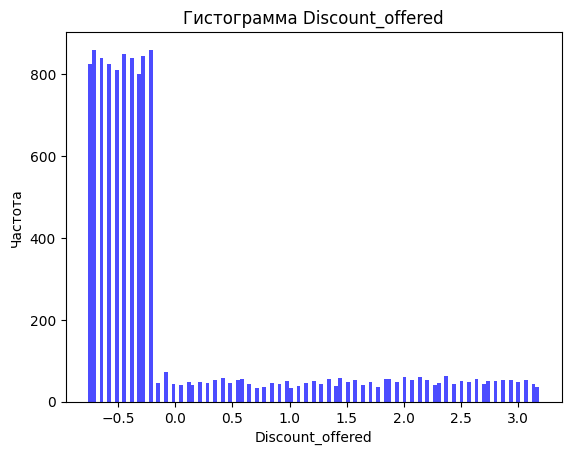

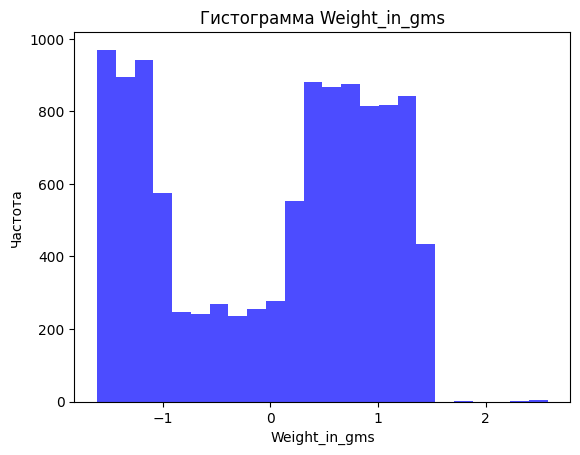

In [19]:
for column in numerical_columns:
    plt.figure()
    plt.hist(df_encoded[column], bins='auto', color='blue', alpha=0.7)
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.title(f'Гистограмма {column}')
    plt.show()

Признаки отмасштабированы, распределение не изменилось

Удаляем ID, т.к. признак не пригодится для моделей

In [20]:
df_encoded = df_encoded.drop(columns=['ID'])

## Тепловая карта корреляций

In [21]:
correlation_matrix = df_encoded.corr()

# Установка порога корреляции для определения групп
threshold = 0.2  # Замените значение на ваше предпочтение

# Поиск корреляционных групп
correlation_groups = []
columns = list(correlation_matrix.columns)
used_columns = set()

for i in range(len(columns)):
    if columns[i] not in used_columns:
        group = [columns[i]]
        for j in range(i + 1, len(columns)):
            if abs(correlation_matrix[columns[i]][columns[j]]) >= threshold:
                group.append(columns[j])
                used_columns.add(columns[j])
        correlation_groups.append(group)

# Вывод корреляционных групп
for group in correlation_groups:
    print(group)

['Customer_care_calls', 'Cost_of_the_Product', 'Weight_in_gms']

['Customer_rating']

['Prior_purchases']

['Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']

['Warehouse_block_A', 'Warehouse_block_D', 'Warehouse_block_F']

['Warehouse_block_B', 'Warehouse_block_D', 'Warehouse_block_F']

['Warehouse_block_C', 'Warehouse_block_D', 'Warehouse_block_F']

['Mode_of_Shipment_Flight', 'Mode_of_Shipment_Ship']

['Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship']

['Product_importance_high', 'Product_importance_low', 'Product_importance_medium']

['Gender_F', 'Gender_M']


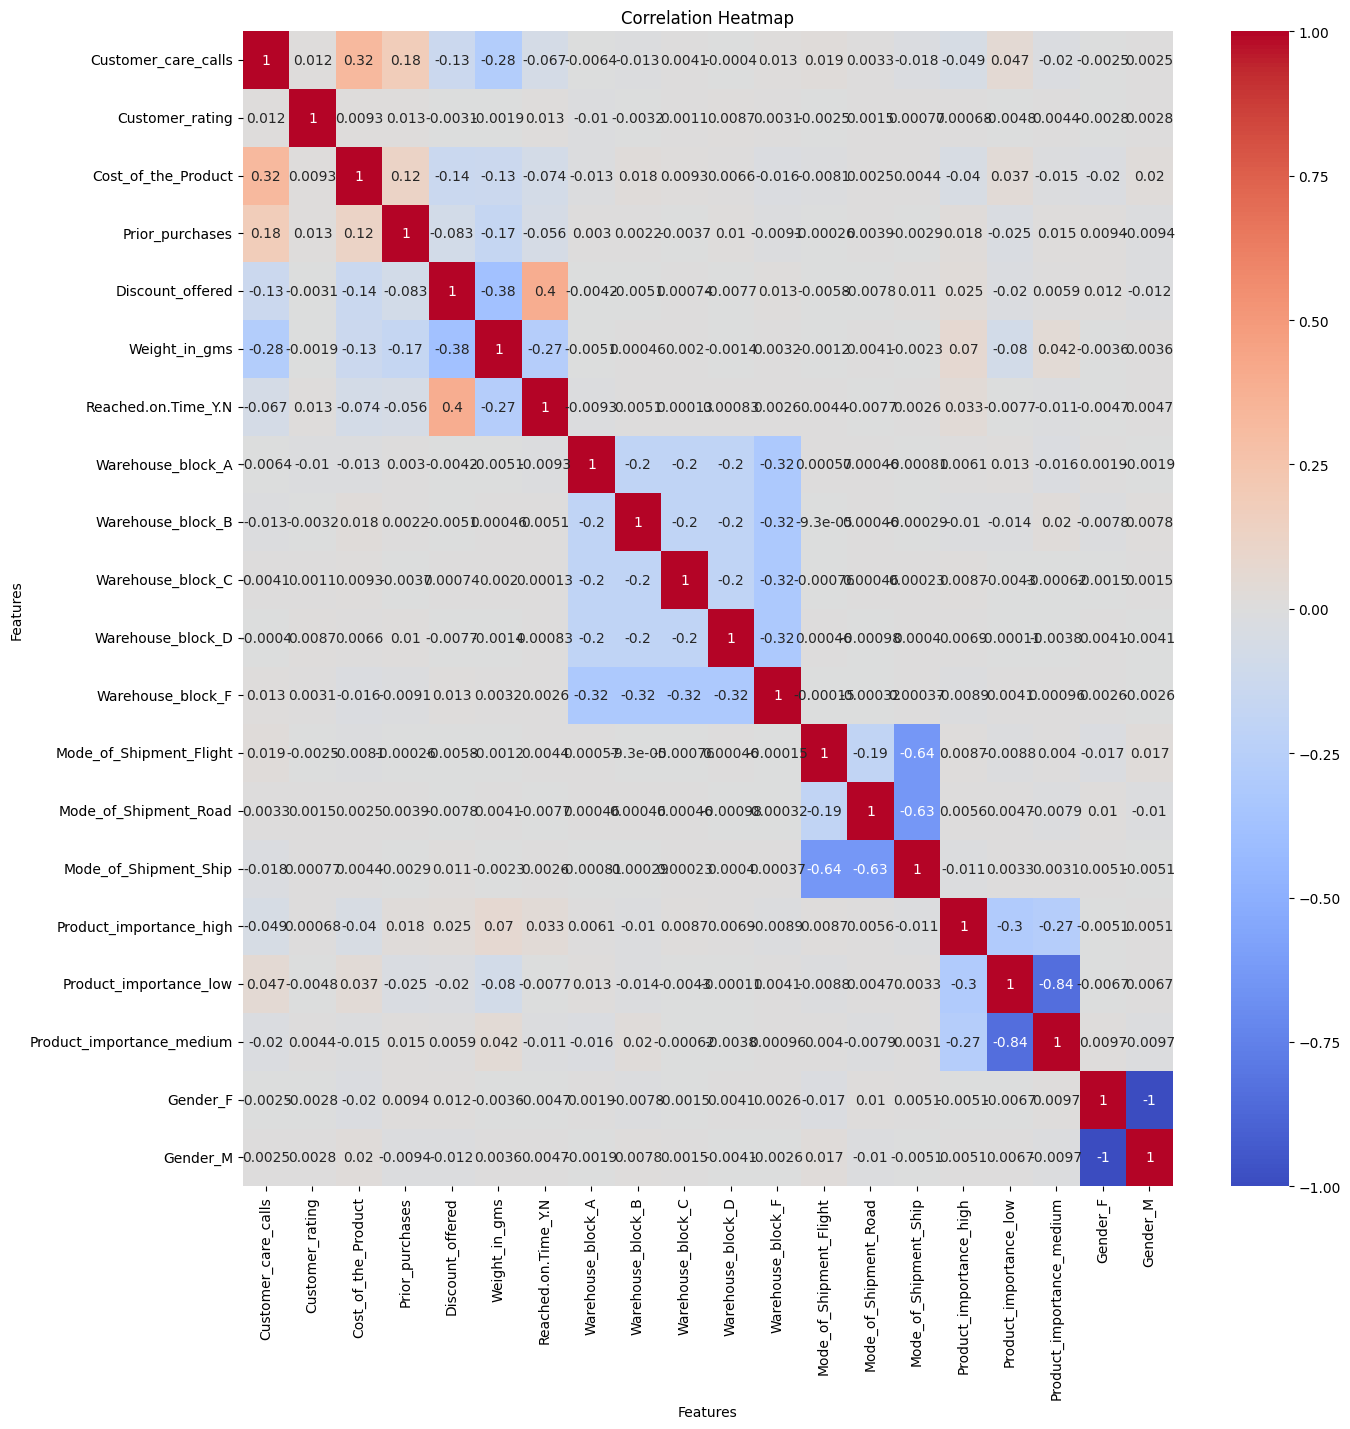

In [22]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap')
plt.show()

Выводы:

* С целевым признаком сильнее всего коррелируют столбцы Discount_offered, Weight_in_gms
* Присутствует корреляционная группа ['Customer_care_calls', 'Cost_of_the_Product', 'Weight_in_gms'] из которой следует выбрать поле, больше всего коррелирующее с целевым признаком - Weight_in_gms.
* Все признаки слабо коррелируют с целевым признаком, поэтому точность модели будет низкой.

Таким образом из итогового набора данных удаляем столбцы 'Customer_care_calls', 'Cost_of_the_Product'

In [23]:
df_final = df_encoded.drop(columns=['Customer_care_calls', 'Cost_of_the_Product'])

## Выбор метрик

1. ROC-AUC:
$ROC AUC = \int_{0}^{1} \text{TP}(t) \, \text{d}\text{FP}(t)$, где TP - доля истинно положительных (True Positive Rate), FP - доля ложно положительных (False Positive Rate), и интеграл берется по кривой ROC. ROC-AUC является мерой качества модели, основанной на ее способности разделять классы.

2. Precision:
$Precision = \frac{TP}{TP + FP}$, где TP - число истинно положительных, FP - число ложно положительных. Измеряет долю верно предсказанных положительных значений относительно всех предсказанных положительных значений. Точность полезна, когда важно минимизировать ложно положительные предсказания. 

3. Recall:
$Recall = \frac{TP}{TP + FN}$, где TP - число истинно положительных, FN - число ложно отрицательных. Измеряет долю верно предсказанных положительных значений относительно всех реальных положительных значений. Полнота полезна, когда важно минимизировать ложно отрицательные предсказания.
4. F1-мера:
$F1 =2\times\frac{Precision\times Recall}{Precision + Recall}$. Является гармоническим средним между точностью и полнотой. Она учитывает обе метрики и является полезной, когда важно достичь баланса между точностью и полнотой

5. Specificity:
$Specificity =\frac{TN}{TN + FP}$
где TN - число истинно отрицательных, FP - число ложно положительных. Измеряет долю верно предсказанных отрицательных значений относительно всех реальных отрицательных значений. Полезна в данном случае, т.к. присуствует дисбаланс классов, т.е. значений "0" меньше чем "1".


## Обучение моделей

In [24]:
def results(X_test, y_test, model):
  y_pred_proba = model.predict_proba(X_test)[:, 1]
  y_pred = model.predict(X_test)
  # Вычисление ROC-кривой
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)

  # Вычисление Precision, Recall и F1
  # Вычисление метрик Precision, Recall и F1
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)

  # Построение ROC-кривой
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc="lower right")
  plt.show()

  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  specificity = tn / (tn+fp)

  # Вывод результатов
  print("ROC-AUC:", roc_auc)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1-score:", f1)
  print("Specificity:", specificity)

### Разделение на обучающую и тестовую выборку

In [25]:
X = df_final.drop(columns=['Reached.on.Time_Y.N'])
y = df_final['Reached.on.Time_Y.N']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Логистическая регрессия

#### Baseline

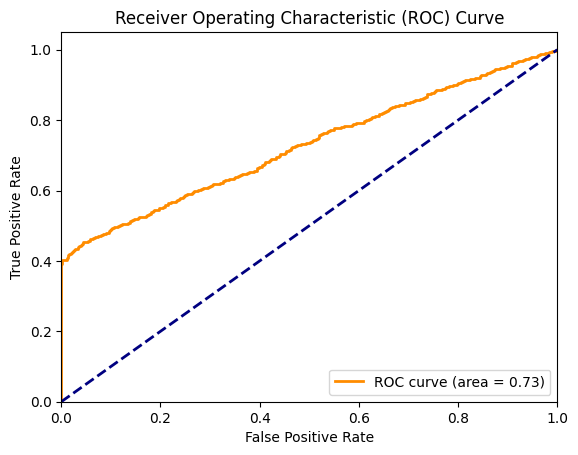

ROC-AUC: 0.7266919240565937

Precision: 0.6986933128362798

Recall: 0.696551724137931

F1-score: 0.6976208749040674

Specificity: 0.5620111731843576


In [26]:
model = LogisticRegression()
model.fit(X_train, y_train)
results(X_test, y_test, model)

#### GridSearch

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 

15 fits failed out of a total of 30.

The score on these train-test partitions for these parameters will be set to nan.

If these failures are not expected, you can try to debug them by setting error_score='raise'.



Below are more details about the failures:

--------------------------------------------------------------------------------

15 fits failed with the following error:

Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score

    estimator.fit(X_train, y_train, **fit_params)

  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit

    solver = _check_solver(self.solver, self.penalty, self.dual)

  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver

    raise ValueError(

Va

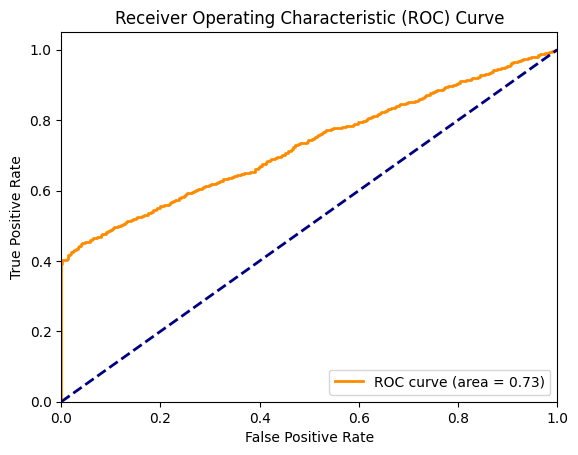

ROC-AUC: 0.7276380059504698

Precision: 0.6962509563886764

Recall: 0.6973180076628352

F1-score: 0.6967840735068913

Specificity: 0.5564245810055866


In [27]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
results(X_test, y_test, best_model)

In [28]:
best_model

LogisticRegression(C=0.1)

### Случайный лес

#### Baseline

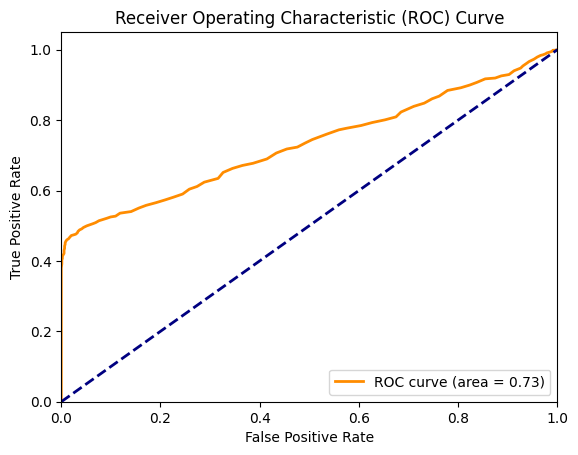

ROC-AUC: 0.7317994820094609

Precision: 0.71869918699187

Recall: 0.6773946360153257

F1-score: 0.6974358974358974

Specificity: 0.6134078212290502


In [29]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
results(X_test, y_test, model)

#### GridSearch

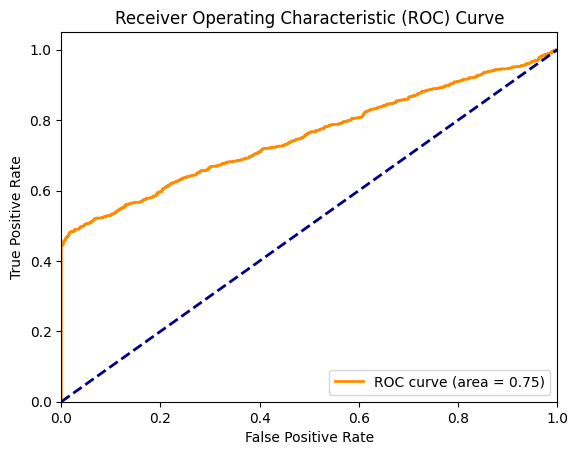

ROC-AUC: 0.7530867527130289

Precision: 0.8346368715083798

Recall: 0.5724137931034483

F1-score: 0.6790909090909091

Specificity: 0.8346368715083798


In [30]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
results(X_test, y_test, best_model)

In [31]:
best_model

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

|Модель|Baseline|Gridsearch|
|-|-|-|
|Логистическая регрессия|ROC-AUC: 0.727<br>Precision: 0.699<br>Recall: 0.697<br>F1-score: 0.698<br>Specificity: 0.562|ROC-AUC: 0.728<br>Precision: 0.696<br>Recall: 0.697<br>F1-score: 0.697<br>Specificity: 0.556|
|Случайный лес|ROC-AUC: 0.729<br>Precision: 0.712<br>Recall: 0.676<br>F1-score: 0.693<br>Specificity: 0.601|ROC-AUC: 0.756<br>Precision: 0.8<br>Recall: 0.626<br>F1-score: 0.702<br>Specificity: 0.772|

* Лучшей моделью оказался случайный лес с гиперпараметрами max_depth=5, min_samples_leaf=2, min_samples_split=5
* У обеих моделей логистической регрессии и у базовой модели случайного леса специфичность ~ 0.6, т.е. модель правильно классифицирует около 60% всех реальных отрицательных значений.
* Обе модели, логистическая регрессия и случайный лес, показывают приемлемые результаты с точки зрения метрик качества классификации.
* Оптимизация с помощью Gridsearch позволила некоторое улучшение модели случайного леса, особенно в ROC-AUC и точности.
